In [1]:
%config Completer.use_jedi = False

In [2]:
import sys

import matplotlib.pyplot as plt

from tlefit_equinoctial_fd import *

In [3]:
line1 = '1 25544U 98067A   14020.93268519  .00009878  00000-0  18200-3 0  5082'
line2 = '2 25544  51.6498 109.4756 0003572  55.9686 274.8005 15.49815350868473'
satellite = EarthSatellite(line1, line2, 'ISS (ZARYA)', ts)

line1 = '1 40019U 14033K   21064.48089419  .00000027  00000-0  13123-4 0  9994'
line2 = '2 40019  97.7274 245.3630 0083155 314.3836  45.0579 14.67086574359033'
satellite = EarthSatellite(line1, line2, 'APRIZESAT 10', ts)

In [4]:
iterations, sigma, sigmas, dxs, bs, lamdas, b_epoch, b_new_epoch, b, P, A = test_tle_fit_normalized_equinoctial(satellite, central_diff=True, lamda=1e-3, rms_epsilon=0.0001, debug=True)

Initial semi-major axis (a) = 7054.852 km
COE elements (original) = [7048.523352797561, 0.0083155, 1.7056648994135064, 4.282392212570847, 5.487028934272845, 0.786408709034353, 1.3123000000000001e-05]
Residuals at epoch time [ 5.60046126e-01 -3.55208784e+00 -1.46641965e+01 -2.73377804e-03
 -7.52656544e-03  1.66212876e-04]
Residual magnitudes at epoch time 15.0987, 0.00800939


#################### ITERATION 1 ####################

Condition number (A): 11.957
Condition number (ATWA_acc): 95915723.74617699
Lambda:  0.001
Residuals after/before 12.7 < 8.2e+06
Covariance a: 12.329 m
dx  [-6.33044180e+00 -7.70065162e-04  8.50590616e-04 -2.03292856e-06
 -9.39080855e-05 -4.11743467e-05 -9.29380112e-04]
COE elements = [7048.521091254834, 0.008329122738225081, 1.7056649730359073, 4.282393715943094, 5.487692180698019, 0.7857471580982693, -0.0009283801118204214]
EQN elements = (7048.521091254834, -0.007837465160169397, -0.0028192952047540127, 4.272647747559796, -1.040637690589159, -0.477252358225

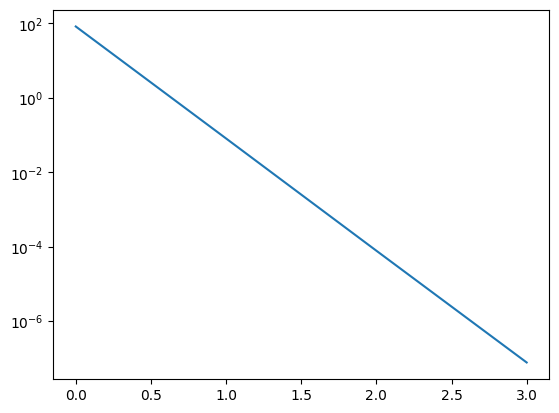

In [5]:
plt.semilogy(range(len(sigmas)), sigmas)

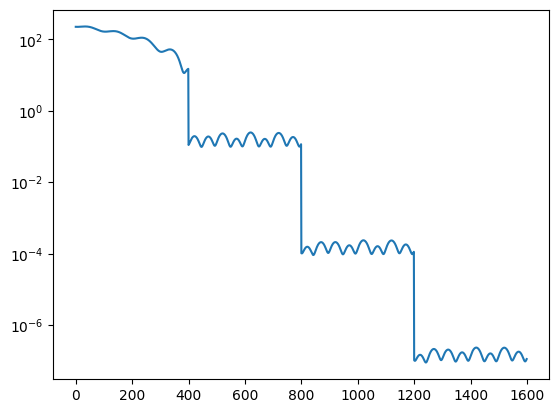

In [6]:
plt.semilogy(bs)

## Play with fit span

In [7]:
debug = False

fits = []
its = []
sigs = []

# FIXME: Try timing the function as well

for x in range(1, 5):
    iterations, sigma, sigmas, dxs, bs, lamdas, b_epoch, b_new_epoch, b, P, A = test_tle_fit_normalized_equinoctial(satellite, central_diff=True, fit_span=x, lamda=1e-3, rms_epsilon=0.0001, debug=debug)
    if debug:
        print()
        print('#' * 80)
        print()
    fits.append(x)
    its.append(iterations)
    sigs.append(sigma)

Text(0, 0.5, 'Iterations')

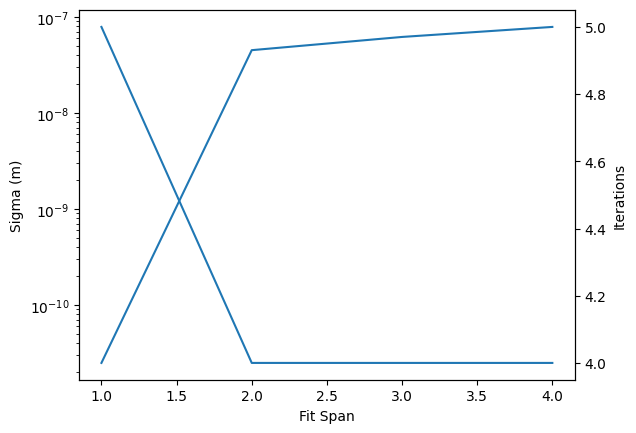

In [8]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.semilogy(fits, sigs)
ax2.plot(fits, its)

ax1.set_xlabel("Fit Span")
ax1.set_ylabel("Sigma (m)")
ax2.set_ylabel("Iterations")

In [16]:
ls tles/*.txt

tles/22335.txt    tles/boom.txt         tles/gps-ops.txt  tles/spire.txt
tles/active.txt   tles/cubesat.txt      tles/planet.txt   tles/stations.txt
tles/analyst.txt  tles/engineering.txt  tles/ses.txt


In [17]:
tle_filename = 'tles/TWOLINE.TXT'
# tle_filename = 'tles/22335.txt'

In [18]:
!head tles/$tle_filename

head: cannot open 'tles/tles/TWOLINE.TXT' for reading: No such file or directory


In [19]:
with open(tle_filename, 'r') as f:
    
    tle_lines = f.readlines()
    
    tles = []
    
    for cnt, ix in enumerate(range(0, len(tle_lines), 3)):
        #print(cnt, ix, tle_lines[ix])
        tles.append((tle_lines[ix].strip(), tle_lines[ix + 1].strip(), tle_lines[ix + 2].strip()))
        

IndexError: list index out of range

In [20]:
len(tles)

70

In [23]:
if tle_filename.split('/')[-1] == 'TWOLINE.TXT':
    with open(tle_filename, 'r') as f:

        tle_lines = f.readlines()

        tles = []
        tle = []

        for line in tle_lines:
            if line.startswith('#'):
                continue
                
            tle.append(line.strip())
            
            if line.startswith('2 '):
                tles.append((tle[0][2:9], tle[0], tle[1]))
                tle = []
        

In [24]:
tles[:3]

[('00005U ',
  '1 00005U 58002B   00179.78495062  .00000023  00000-0  28098-4 0  4753',
  '2 00005  34.2682 348.7242 1859667 331.7664  19.3264 10.82419157413667'),
 ('04632U ',
  '1 04632U 70093B   04031.91070959 -.00000084  00000-0  10000-3 0  9955',
  '2 04632  11.4628 273.1101 1450506 207.6000 143.9350  1.20231981 44145'),
 ('06251U ',
  '1 06251U 62025E   06176.82412014  .00008885  00000-0  12808-3 0  3985',
  '2 06251  58.0579  54.0425 0030035 139.1568 221.1854 15.56387291  6774')]

In [25]:
# LM Test

limit = 100#9*1000000
failed_tles = []

print(f'{"TLE":24s} {"Iter":>5s} {"Cov (m)":>10s}   {"StdDev (m)":>10s}   {"Res @ Epoch (m)":>13s}   {"Res @ End (m)":>13s}')

for idx, tle in enumerate(tles):

    line1 = tle[1]
    line2 = tle[2]
    satellite = EarthSatellite(line1, line2, tle[0], ts)
    
    try:
        iterations, sigma, sigmas, dxs, bs, lamdas, b_epoch, b_new_epoch, b, P, A = test_tle_fit_normalized_equinoctial(satellite, central_diff=True, fit_span=1, max_iter=25, lamda=1e-3, rms_epsilon=0.0001, debug=False)
        
        print(f'{tle[0]:24s} {iterations:5d} {np.sqrt(np.diag(P)[0]) * 1000:10.3f} {sigma * 1000:12.2e} {np.linalg.norm(b_new_epoch[0:3]) * 1000:17.2e} {np.linalg.norm(b[0:3]) * 1000:15.2e}')
    except:
        print(f'{tle[0]:24s} Failed')
    
    if idx == limit:
        break
    

TLE                       Iter    Cov (m)   StdDev (m)   Res @ Epoch (m)   Res @ End (m)
00005U                       5    236.099     1.38e-08          4.11e-08        3.73e-08
04632U                       4     47.433     9.26e-04          2.19e-03        2.19e-03
06251U                       4    136.803     7.89e-05          3.85e-05        3.58e-05
08195U                       7    758.035     3.00e-08          8.34e-08        8.09e-08
09880U                       6    757.837     6.73e-08          1.14e-07        1.17e-07
09998U                       3     43.933     8.65e-02          2.67e-01        2.67e-01
14128U                       4     44.486     1.18e-03          3.03e-03        3.04e-03
16925U                       5    415.364     1.02e-03          1.61e-03        1.62e-03
20413U                       8     27.231     6.62e-02          7.49e-01        7.47e-01
21897U                       5    785.649     2.34e-06          4.51e-06        4.49e-06
22312U               

/home/dan/GIT/tle-tailor/tlefit_equinoctial_fd.py:194: RuntimeWarning: overflow encountered in multiply
  P = np.linalg.pinv(ATWA_acc + lamda * ATWA_acc, hermitian=hermitian)


23333U                   Failed
23599U                       4    502.982     1.23e-03          4.91e-03        4.86e-03
24208U                       4     44.463     8.05e-04          1.65e-03        1.64e-03
25954U                       2      0.445     9.43e+03          1.65e+04        1.65e+04
26900U                       9      1.408     1.81e+02          5.42e+02        5.44e+02
26975U                       4     41.658     1.02e-01          1.97e-01        1.96e-01
28057U                       5    192.057     9.85e-07          2.08e-06        1.97e-06
28129U                       3     44.183     6.17e-02          1.73e-01        1.74e-01
28350U                       5    158.165     1.36e-04          2.12e-05        2.33e-05
28623U                       4    104.222     2.16e-02          1.20e-02        1.17e-02
28626U                       7      0.000     1.46e+03          4.02e+03        4.04e+03
28872U                       4    118.151     5.22e-02          3.57e-03      